# **DSL 24-1 기초 과제 1**

### 기수 : 12기
### 이름 : 김건우

In [1]:
# 코랩에서 작성할 경우 아래 주석을 해제해주세요
# from google.colab import drive
# drive.mount('/content/drive')

필수 라이버러리 갖고오기

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import timeit
from scipy import stats

## **2-3**

해당 문제에서는 예시 사진을 이용해서 SVD-Decomposition 이 어떻게 사진을 압축하는데에 사용이 되는지 보여주고 있습니다. 본인이 선정한 사진에 SVD-Decomposition 을 활용해서 Sigma 차원을 $100$ 으로 설정할 경우 용량이 실제로 줄어드는지 확인해보겠습니다.

경로 설정 (image.jpg 경로로 바꿔주세요!)

In [3]:
path_to_image = "./data//image.jpg"

이미지 출력해서 확인해보기 (**편의상 흑백을 사용할 예정입니다**)

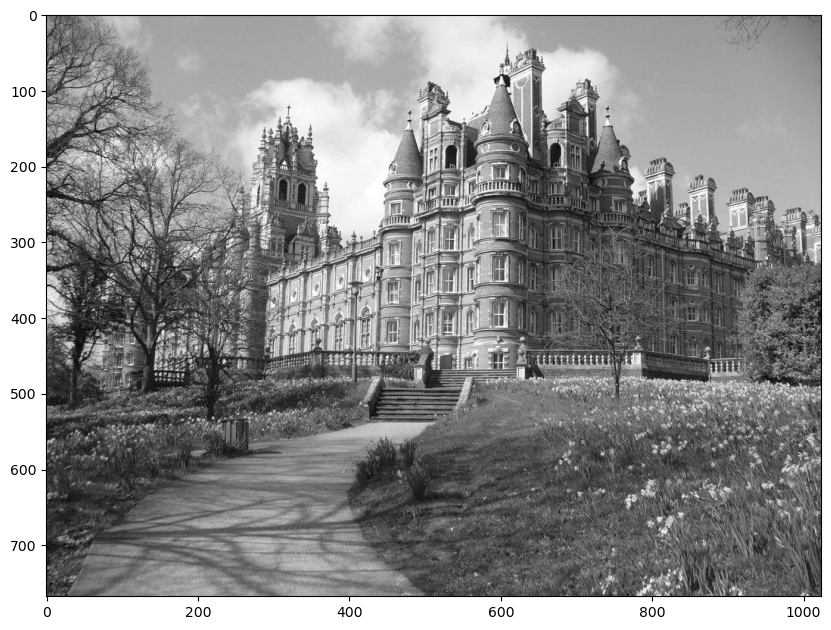

In [4]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10, 13))
plt.imshow(image, cmap='gray')

다음과 같이 이미지를 Float32 형태의 데이터로 바꾸겠습니다.

In [5]:
image_float = image.astype(np.float32)

그 뒤에 np.linalg.svd 를 활용해서 SVD-Decomposition 을 진행하겠습니다. 여기에서 np.linalg.svd 의 아웃풋은 $U$, 시그마 값, $V^\top$ 가 나오게 되며, 시그마 값을 이용해서 대각선에는 시그마 값들이 있으며 나머지는 $0$ 인 메트릭스를 만들겠습니다.

In [6]:
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)

# 시그마 행렬 확인 용도
print(Sigma_mat.shape)

(768, 1024)


 여기서부터는 해당 이미지에 관해서 고유벡터 $70$ 개만 쓰겠습니다. 즉(나머지 원소들은 $0$ )

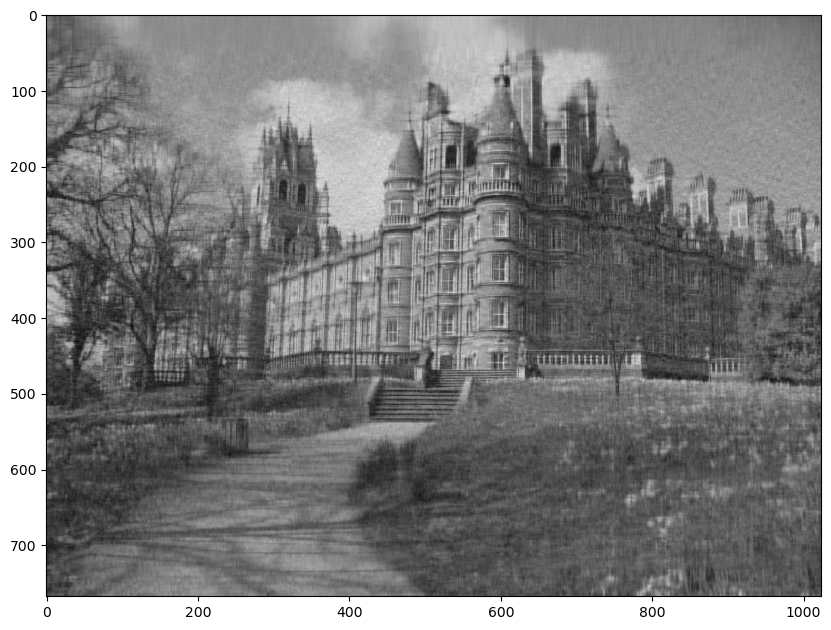

In [7]:
image_composition = np.matmul(U[:, :70], np.matmul(Sigma_mat[:70, :70], Vt[:70, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

전에 비해서 확실히 흐릿해진 모습을 보이고 있습니다. 그렇다면 해당 사진과 이전 사진과 비교해서 어떤 것이 더 많은 용량 (즉 더 많은 Non-Zero 값)을 사용하고 있는지 알아보겠습니다.

In [8]:
def count_nonzero_full_image():
    return np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt)

def count_nonzero_compressed_image():
    return np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :])

full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  1639168  Non-zero Elements
Image Composition uses  125510  Non-zero Elements
Processing Time for 10 Full Images: 7.75586 seconds
Processing Time for 10 Compressed Images: 0.43864 seconds


원본과 확연히 큰 차이를 보이고 있습니다. 그럼에도 원래 이미지가 무엇을 표현하고 싶은지에 대한 정보를 여전히 포함하고 있습니다. 
=> SVD-Decomposition 을 활용하면 더 적은 용량으로 원본의 정보를 살릴 수 있다!

## **문제 2-3**

아래에는 Skeleton Code 가 있습니다. 빈칸에 자기가 원하는 사진과 차원 수를 조정하면서 원본에 비해서 적은 용량을 차지하면서도 원본에 대한 정보를 유지해주세요.

In [9]:
path_to_image = "./data/image2.jpg"

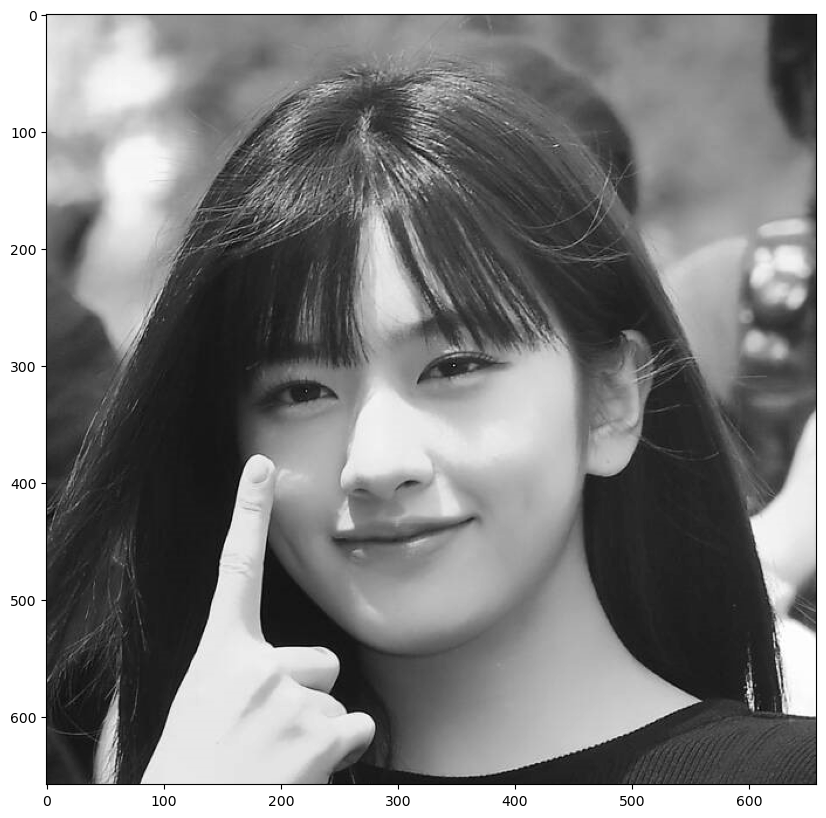

In [10]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(10,10))
plt.imshow(image, cmap='gray')

In [11]:
image_float = image.astype(np.float32)
U, Sigma, Vt = np.linalg.svd(image_float)
Sigma_mat = np.zeros((image_float.shape[0], image_float.shape[1]))
np.fill_diagonal(Sigma_mat, Sigma)
print("Image Float's Shape : ", image_float.shape)

Image Float's Shape :  (658, 658)


시그마 메트릭스 $(\Sigma)$ 차원 설정

In [12]:
num_elements = 50

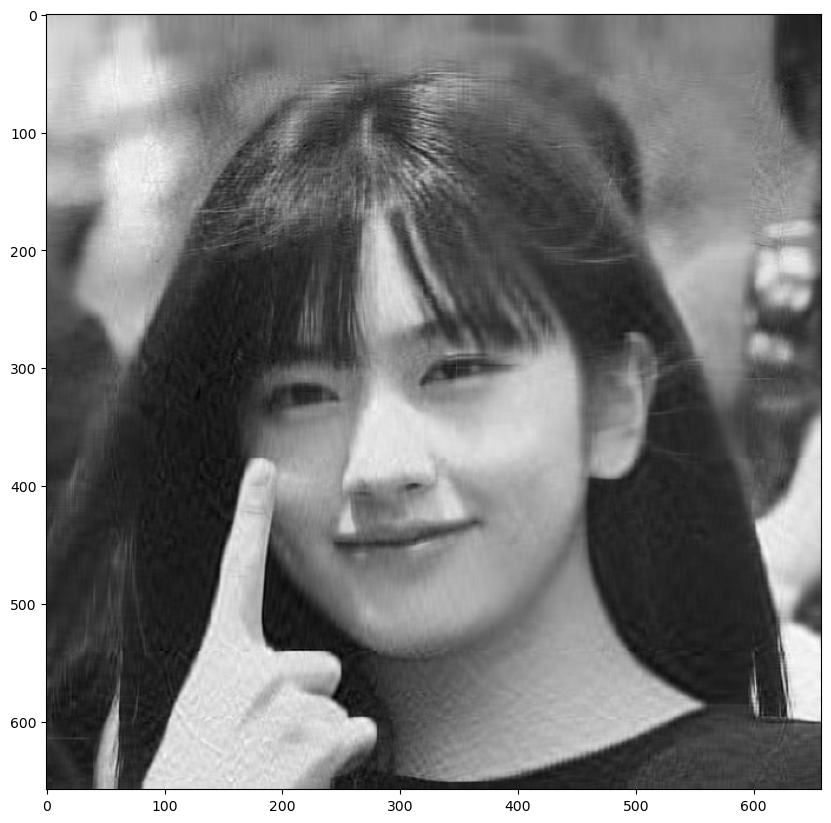

In [13]:
image_composition = np.matmul(U[:, :num_elements], np.matmul(Sigma_mat[:num_elements, :num_elements], Vt[:num_elements, :]))
fig = plt.figure(figsize=(10, 13))

plt.imshow(image_composition, cmap = 'gray')

In [14]:
full_image_time = 0
compressed_image_time = 0

for i in range(10) :
  full_image_time += timeit.timeit(count_nonzero_full_image, number=100)
  compressed_image_time += timeit.timeit(count_nonzero_compressed_image, number=100)

print("Image Float uses ", np.count_nonzero(U) + np.count_nonzero(Sigma_mat) + np.count_nonzero(Vt), " Non-zero Elements")
print("Image Composition uses ", np.count_nonzero(U[:, :70]) + np.count_nonzero(Sigma_mat[:70, :70]) + np.count_nonzero(Vt[:70, :]), " Non-zero Elements")
print(f"Processing Time for 10 Full Images: {round(full_image_time, 5)} seconds")
print(f"Processing Time for 10 Compressed Images: {round(compressed_image_time, 5)} seconds")

Image Float uses  866586  Non-zero Elements
Image Composition uses  92190  Non-zero Elements
Processing Time for 10 Full Images: 4.4131 seconds
Processing Time for 10 Compressed Images: 0.37778 seconds


## **문제 4-2**

파이썬의 scipy.stats 을 활용해서 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.

heights.csv 경로 설정하기

In [15]:
path_to_csv = "./data/heights.csv"

전처리

In [16]:
data = pd.read_csv(path_to_csv)
DSL = data[data['which'] == 'DSL']
ESC = data[data['which'] == 'ESC']
Else = data[data['which'] == 'Else']

DSL 데이터 형태

In [17]:
DSL.head()

,heights,which
0,181.8,DSL
1,161.3,DSL
2,177.8,DSL
3,169.1,DSL
4,181.2,DSL


ESC 데이터 형태

In [18]:
ESC.head()

,heights,which
78,171.1,ESC
79,159.2,ESC
80,184.9,ESC
81,176.1,ESC
82,184.8,ESC


Else 데이터 형태

In [19]:
  Else.head()

,heights,which
141,180.6,Else
142,169.3,Else
143,176.0,Else
144,180.3,Else
145,177.7,Else


In [20]:
anova_result = stats.f_oneway(DSL['heights'], ESC['heights'], Else['heights'])

print(anova_result)

F_onewayResult(statistic=6.82185346949053, pvalue=0.0013059664602332191)


## **문제 6**

파이썬의 pandas와 numpy 활용과 관련한 몇몇 예제입니다. 주어진 실행 결과와 요구하는 바에 맞게 코드를 작성하시오.

#### 6-A. Pandas

In [21]:
import pandas as pd

path_to_csv = "./data/train.csv"
data = pd.read_csv(path_to_csv)

In [22]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


6-1. 사용자의 Name은 여러 ,로 나누어져 있습니다. 첫번째 , 이전의 텍스트를 새로운 filteredName이라는 새로운 변수로 dataframe에 추가해주세요.

In [23]:
# TO-DO

# 1. Name 변수에 대한 전처리
# 2. 전처리 한 변수를 다시 dataframe에 추가
data['filteredName'] = data['Name'].str.split(',').str[0]
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,filteredName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


6-2. 사용자를 PassengerId가 아닌 Age를 기준으로 정렬하여주세요.

In [24]:
# TO-DO

# 정렬
data = data.sort_values(by='Age')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,filteredName
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,Thomas
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,Hamalainen
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,Baclini
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,Baclini
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,Caldwell


6-3. 위의 head로 살폈을 때, Cabin 변수에는 결측치 (NaN) 값이 많은 것으로 보여집니다. Cabin 변수의 데이터 종류 (NaN-?개, C95-?개 등)을 확인하여 히스토그램으로 시각화해주세요.

In [25]:
# TO-DO

# 1. Cabin 변수의 값 종류 확인
# 2. 히스토그램 시각화

cabin_info = data['Cabin'].value_counts(dropna=False)
cabin_info

Cabin
NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
D                3
              ... 
C118             1
E68              1
C32              1
C62 C64          1
C47              1
Name: count, Length: 148, dtype: int64

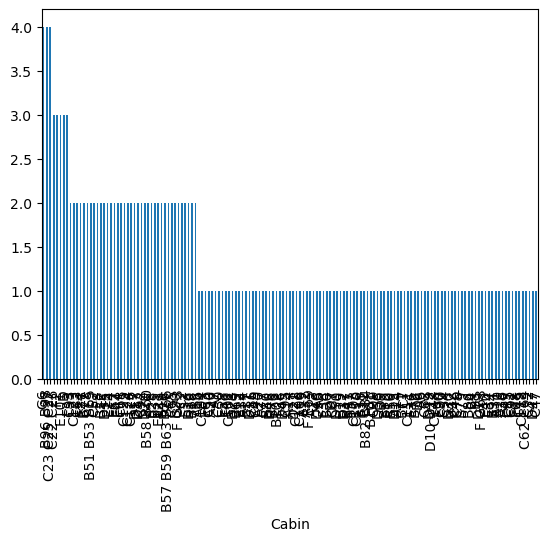

In [26]:
cabin_info_non_nan = data['Cabin'].value_counts(dropna=True)
cabin_info_non_nan.plot(kind='bar')
plt.show()

6-4. (Optional) 

Sibsp는 # of siblings / spouses aboard the Titanic, Parch는 # of parents / children abroad the Titanic 입니다. Sibsp 변수와 Parch 중 Survived 변수 중 Survived 여부에 영향을 끼치는 하나의 변수를 선택한다면 무엇을 선택할 것이며, 그 이유가 무엇인가요?

#### 6-B. Numpy

6-5. 아래 lst와 같이 주어진 행렬이 있습니다. 해당 3x3 행렬을 4x2x2 tensor로 변환해주세요. 각각의 2x2 행렬은 좌측 상단 / 좌측 하단 / 우측 상단 / 우측 하단을 뜻합니다.

In [27]:
import numpy as np

lst = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

arr = np.array(lst)

# TO-DO
tensor = np.array([
    arr[0:2, 0:2],  # 좌측 상단
    arr[1:3, 0:2],  # 좌측 하단
    arr[0:2, 1:3],  # 우측 상단
    arr[1:3, 1:3]   # 우측 하단
])

print(tensor)

[[[1 2]
  [4 5]]

 [[4 5]
  [7 8]]

 [[2 3]
  [5 6]]

 [[5 6]
  [8 9]]]


6-6. Unifrom Distribution으로부터 Sampling한 100개의 점과 Gaussian Distribution으로부터 Sampling한 100개의 점의 분포를 시각화해주세요. 시각화 시 plot에 각 분포의 평균/중앙값을 점선으로 함께 시각화해주세요.

1. uniform distribution은 (0, 1) 범위로, gaussian은 mean이 0, std가 1입니다.
2. 해당 문제에서 사용할 수 있는 라이브러리는 Numpy와 Matplotlib로 제한합니다.

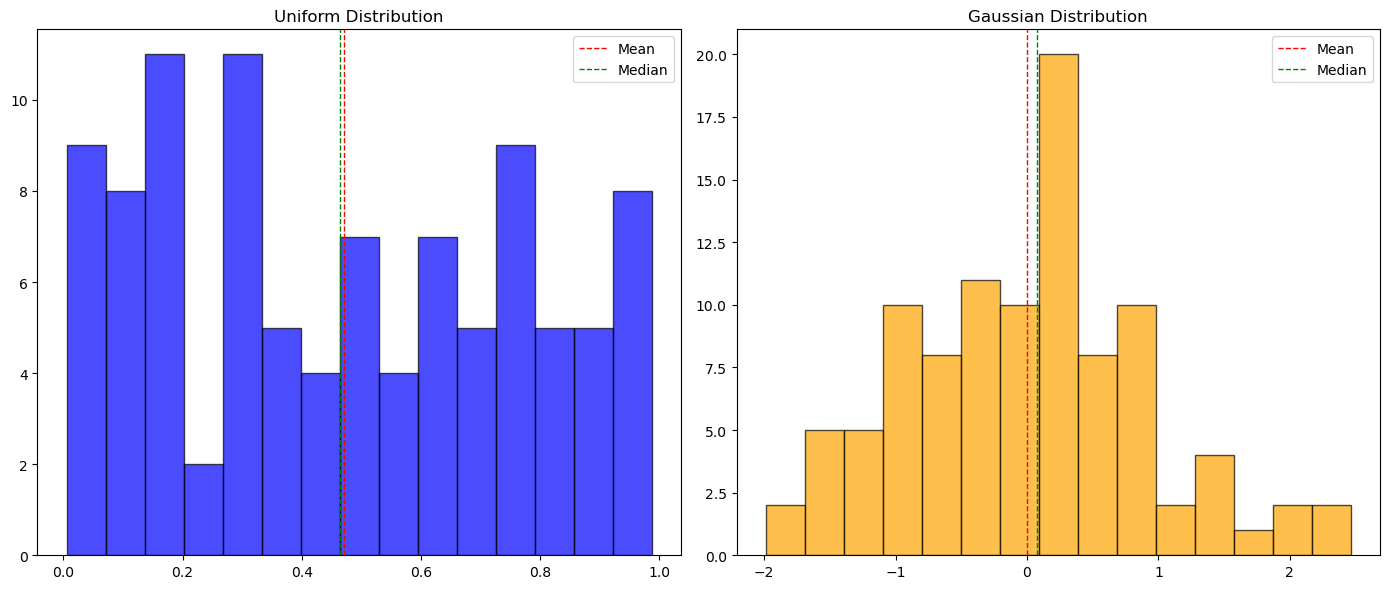

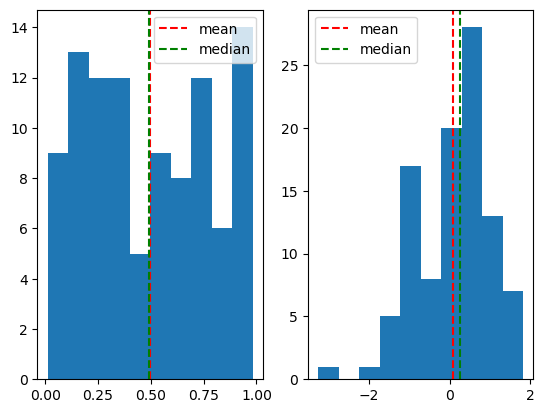

In [28]:
# TO-DO

# 1. Uniform Distribution으로부터 100개의 점 Sampling
uniform_samples = np.random.uniform(0, 1, 100)
# 2. Gaussian Distribution으로부터 100개의 점 Sampling
gaussian_samples = np.random.normal(0, 1, 100)
# 3. 시각화
# 4. 평균/중앙값 점선으로 시각화
uniform_mean = np.mean(uniform_samples)
uniform_median = np.median(uniform_samples)

gaussian_mean = np.mean(gaussian_samples)
gaussian_median = np.median(gaussian_samples)

plt.subplot(1,2,1)
plt.hist(uniform_samples)
plt.axvline(uniform_mean, linestyle='dashed', label='mean', color='red')
plt.axvline(uniform_median, linestyle='dashed', label='median', color='green')
plt.legend()

plt.subplot(1,2,2)
plt.hist(gaussian_samples)
plt.axvline(gaussian_mean, linestyle='dashed', label='mean', color='red')
plt.axvline(gaussian_median, linestyle='dashed', label='median', color='green')
plt.legend()

plt.show()